In [2]:
data <- read.csv("sdg7_renewable_energy_percent.csv")
head(data)
summary(data)

,Year,Renewable_Energy_Percent
,<int>,<dbl>
1,1990,12.75
2,1991,12.26
3,1992,13.91
4,1993,15.69
5,1994,13.52
6,1995,13.99


      Year      Renewable_Energy_Percent
 Min.   :1990   Min.   :12.26           
 1st Qu.:1998   1st Qu.:15.98           
 Median :2006   Median :18.19           
 Mean   :2006   Mean   :19.30           
 3rd Qu.:2014   3rd Qu.:22.46           
 Max.   :2022   Max.   :29.31           

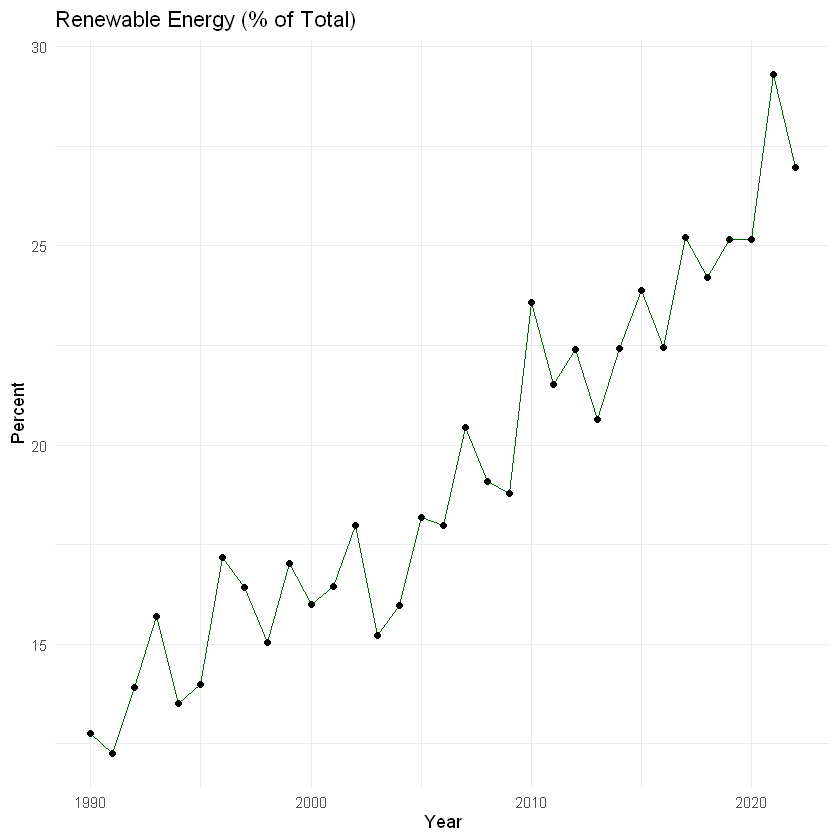

In [3]:
library(ggplot2)

ggplot(data, aes(x = Year, y = Renewable_Energy_Percent)) +
  geom_line(color = "darkgreen") +
  geom_point() +
  labs(title = "Renewable Energy (% of Total)", y = "Percent", x = "Year") +
  theme_minimal()

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
`geom_smooth()` using formula = 'y ~ x'


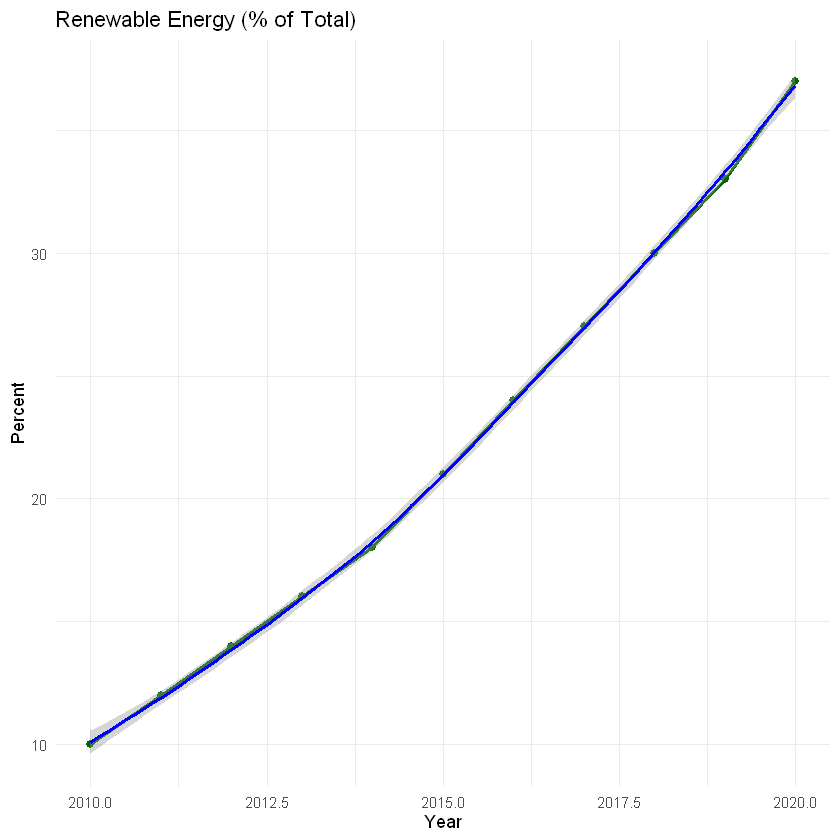

In [4]:
library(ggplot2)

# Example data frame
data <- data.frame(
  Year = 2010:2020,
  Renewable_Energy_Percent = c(10, 12, 14, 16, 18, 21, 24, 27, 30, 33, 37)
)

# Plot with line, points, and smoothing
ggplot(data, aes(x = Year, y = Renewable_Energy_Percent)) +
  geom_line(color = "darkgreen", size = 1) +
  geom_point(color = "darkgreen", size = 2) +
  geom_smooth(method = "loess", se = TRUE, color = "blue") +  # smooth trend line
  labs(title = "Renewable Energy (% of Total)",
       x = "Year",
       y = "Percent") +
  theme_minimal()


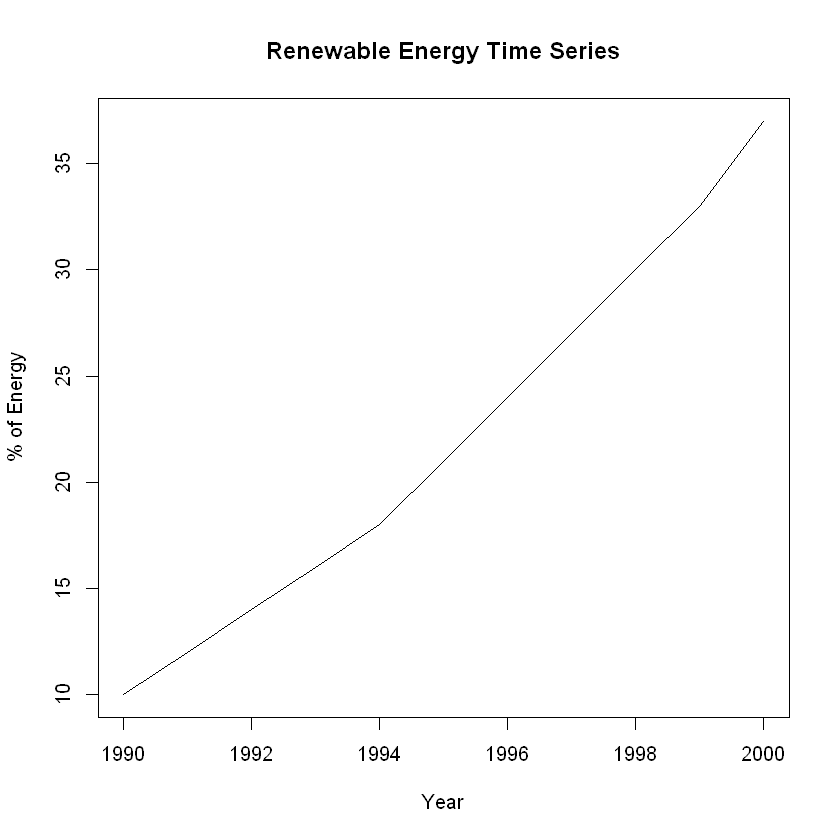

In [5]:
ts_data <- ts(data$Renewable_Energy_Percent, start = 1990, frequency = 1)
plot(ts_data, main = "Renewable Energy Time Series", ylab = "% of Energy", xlab = "Year")

In [8]:

library(tseries)

adf.test(ts_data)  # Augmented Dickey-Fuller Test


	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -0.60609, Lag order = 2, p-value = 0.9662
alternative hypothesis: stationary


In [18]:
library(forecast)

model <- auto.arima(ts_data)
summary(model)

Series: ts_data 
ARIMA(0,2,0) 

sigma^2 = 0.2222:  log likelihood = -6
AIC=14   AICc=14.58   BIC=14.2

Training set error measures:
                    ME      RMSE       MAE       MPE      MAPE      MASE
Training set 0.1814116 0.4264121 0.1830379 0.6758903 0.6894422 0.0677918
                   ACF1
Training set -0.1298704

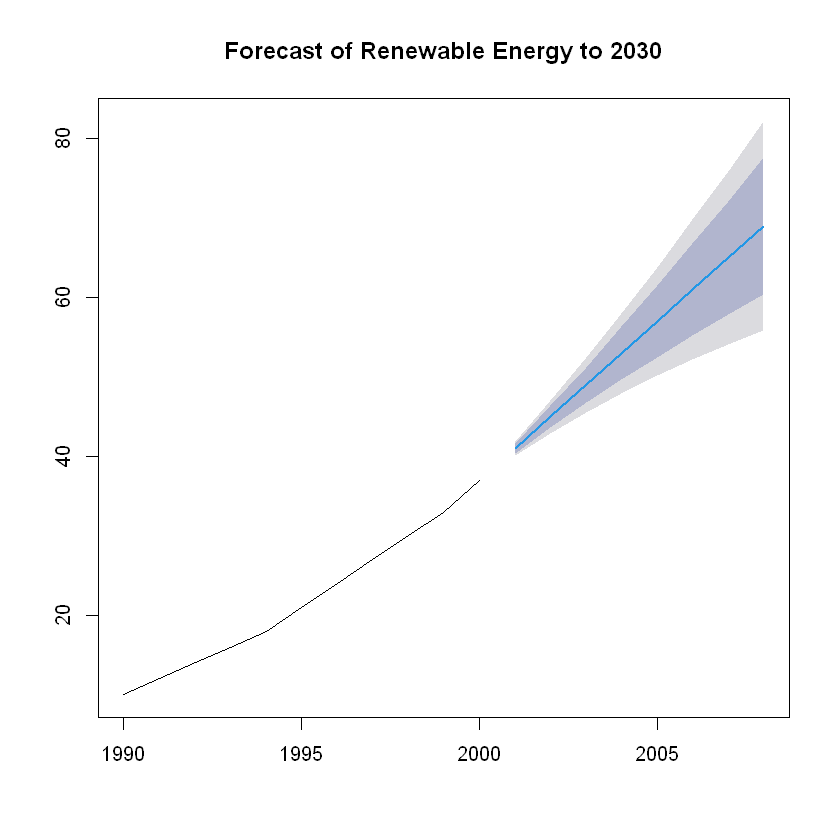

In [19]:
forecasted <- forecast(model, h = 8)  # 2023 to 2030
plot(forecasted, main = "Forecast of Renewable Energy to 2030")

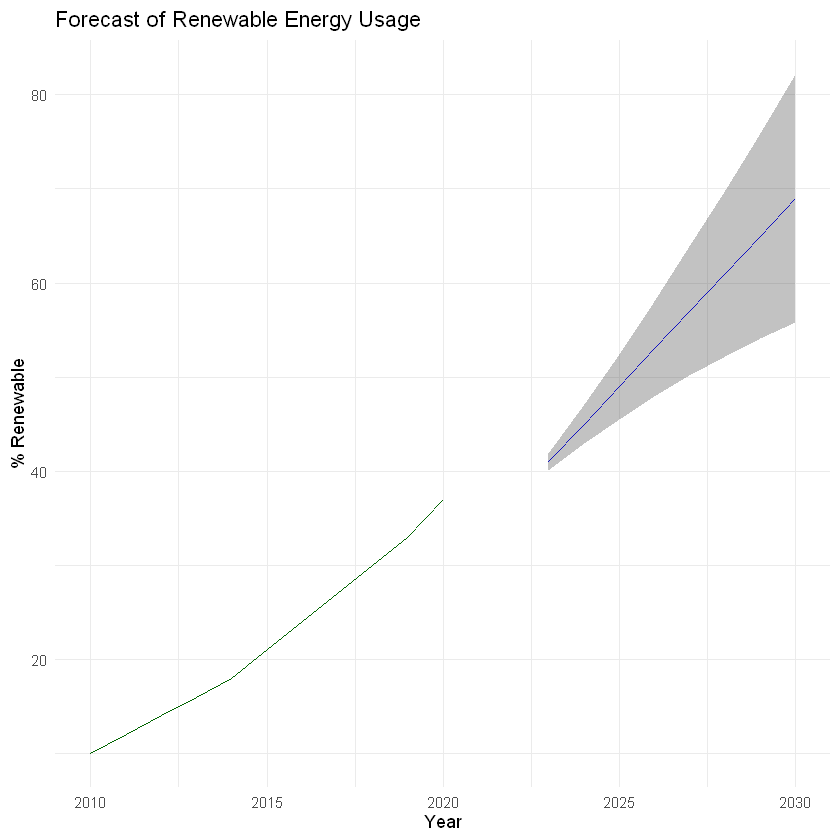

In [20]:
forecast_df <- data.frame(
  Year = 2023:2030,
  Forecast = forecasted$mean,
  Lower = forecasted$lower[,2],
  Upper = forecasted$upper[,2]
)

ggplot() +
  geom_line(data = data, aes(x = Year, y = Renewable_Energy_Percent), color = "darkgreen") +
  geom_line(data = forecast_df, aes(x = Year, y = Forecast), color = "blue") +
  geom_ribbon(data = forecast_df, aes(x = Year, ymin = Lower, ymax = Upper), alpha = 0.3) +
  labs(title = "Forecast of Renewable Energy Usage", y = "% Renewable", x = "Year") +
  theme_minimal()